In [2]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Ruta al dataset
path_df = './datasets/dataset_more_labeled.csv'

df = pd.read_csv(path_df, sep = ',', header = 0)
print(df.head(10))

    age                                                bio               job  \
0  18.0                    ::anatomical_heart: :venezuela:  ['NotSpecified']   
1  25.0  i don't know what i want or what i'm looking f...  ['NotSpecified']   
2  20.0             to the insta better: :sparkling_heart:  ['NotSpecified']   
3  19.0  :libra: :woman_fairy_light_skin_tone::performi...  ['NotSpecified']   
4  20.0  if you are the one in the last photo, go ahead...  ['NotSpecified']   
5  24.0  discovering new places; chill out plans and th...  ['NotSpecified']   
6  23.0                                              :ice:  ['NotSpecified']   
7  21.0                                         best insta  ['NotSpecified']   
8  26.0  venezuela :venezuela::red_heart: :round_pushpi...  ['NotSpecified']   
9  18.0   talk to me on instagram < i put a random age ...  ['NotSpecified']   

                           school              anthem_title  \
0                             NaN                       

In [4]:
# Crear la columna 'gender-specified'
df['gender-specified'] = df['gender'].apply(lambda x: 1 if x == 'NotSpecified' else 0)

In [5]:
# Prueba de normalidad para cada grupo
group_0 = df[df['gender-specified'] == 0]['total_photos']
group_1 = df[df['gender-specified'] == 1]['total_photos']

shapiro_0 = stats.shapiro(group_0)
shapiro_1 = stats.shapiro(group_1)

print("Prueba de normalidad para el grupo 0:", shapiro_0)
print("Prueba de normalidad para el grupo 1:", shapiro_1)

Prueba de normalidad para el grupo 0: ShapiroResult(statistic=np.float64(0.9606096090217925), pvalue=np.float64(9.136368293555765e-20))
Prueba de normalidad para el grupo 1: ShapiroResult(statistic=np.float64(0.9610301673242728), pvalue=np.float64(4.352646731728328e-25))


In [8]:
# Prueba de homogeneidad de varianzas (Levene)
levene_test = stats.levene(group_0, group_1)
print("P- valor obtenido en la prueba de homogeneidad de varianzas (Levene):", levene_test.pvalue)

P- valor obtenido en la prueba de homogeneidad de varianzas (Levene): 0.1353400448400942


In [6]:
# Realizar la prueba t de Student
t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=True)  # equal_var=True asume varianzas iguales

print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -4.079987377517195, p-value: 4.5929769813094875e-05


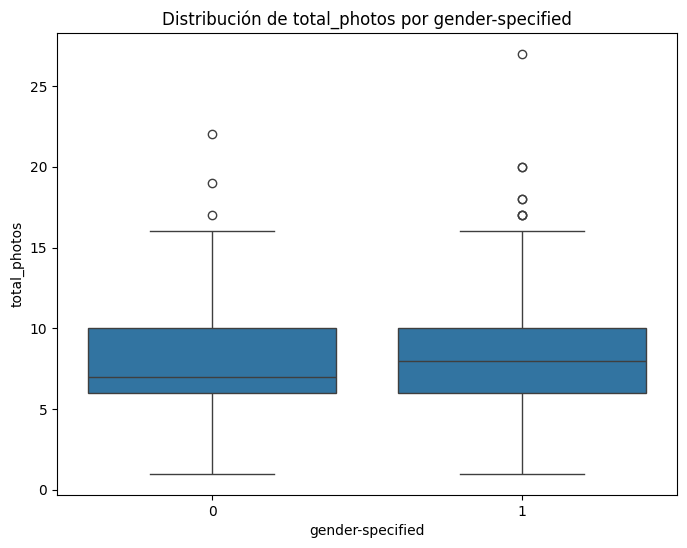

In [7]:
# Boxplot para visualizar la distribución de total_photos por gender-specified
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender-specified', y='total_photos', data=df)
plt.title('Distribución de total_photos por gender-specified')
plt.show()